In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import sys
from pathlib import Path
sys.path.insert(0,str(Path(os.path.abspath('.')).parent.parent))


## Read data

In [2]:
ticket_path = Path.home()/"OneDrive-3E/Research/Solar/tickets/2024/IN3043_accuracy_factors_analysis/IN3136_EURAC_shared_folder"


In [3]:
validation_metrics = pd.read_csv(os.path.join(ticket_path, "validation_removed/validation_results_sites.csv"), index_col = 0)


## Check nrmse_daily

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


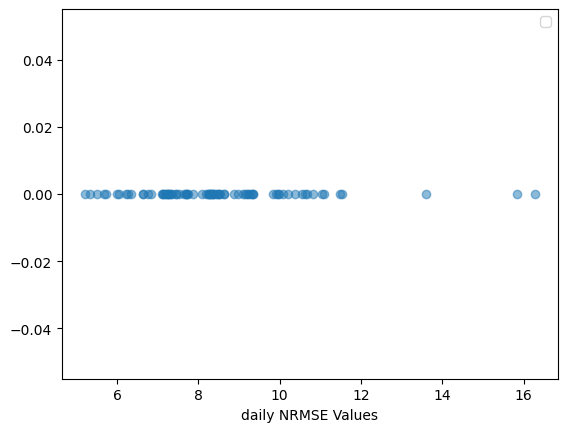

In [10]:
plt.scatter(validation_metrics['nrmse_daily'], np.zeros_like(validation_metrics['nrmse_daily']), alpha=0.5)
plt.xlabel('daily NRMSE Values')
plt.legend()
plt.show()

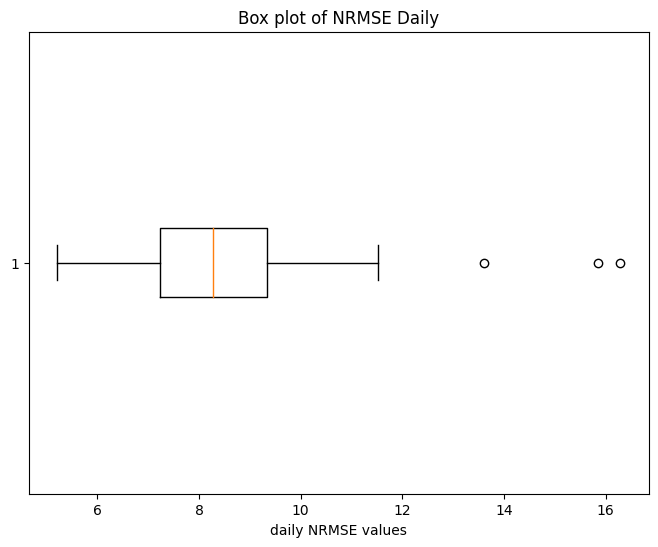

In [9]:
plt.figure(figsize=(8, 6))
plt.boxplot(validation_metrics['nrmse_daily'], vert=False)
plt.xlabel('daily NRMSE values')
plt.title('Box plot of NRMSE Daily')
plt.show()


In [9]:
validation_metrics.sort_values('nrmse_daily')

,nmbe,nrmse_yearly,nrmse_monthly,nrmse_daily,valid_data_pairs_daily,Cluster
badajoz,-0.37,0.63,2.12,5.20,2176,1
arenosillo,-2.15,2.18,2.79,5.34,2165,1
valencia_arpt,0.55,0.63,2.46,5.51,2166,1
huelva,-0.22,0.47,2.60,5.69,2124,1
valladolid,-0.30,0.75,2.45,5.73,2187,1
...,...,...,...,...,...,...
girona_arpt,3.79,4.10,5.69,11.48,1941,2
aberporth,-5.65,5.65,6.63,11.53,719,2
leinefelde,5.35,5.35,8.51,13.61,364,0
cornale,10.13,11.59,13.12,15.84,2370,0


In [22]:
validation_metrics.sort_values('nrmse_daily').tail(15)

,nmbe,nrmse_yearly,nrmse_monthly,nrmse_daily,valid_data_pairs_daily,Cluster
edinburgh,-1.43,1.54,2.91,9.98,647,2
lautertal_oberlauter,2.35,2.35,3.69,10.07,364,2
hohenpeißenberg,0.58,0.77,3.82,10.21,2556,2
schleswig,2.96,3.40,4.90,10.37,2553,2
lund,4.37,4.78,6.32,10.55,2000,2
aberdeen_dyce_arpt,-0.71,0.74,3.49,10.62,629,2
soria,-3.47,3.64,4.23,10.67,2142,2
gurteen,2.35,2.52,4.56,10.82,2192,2
santiago_arpt,4.95,5.34,7.13,11.05,2021,2
gonzaga,-6.26,6.30,7.57,11.08,2557,2


## Save to geojson

In [16]:
ticket_path = Path.home()/"OneDrive-3E/Research/Solar/tickets/2024/IN3043_accuracy_factors_analysis"
complexity = pd.read_csv(os.path.join(ticket_path, 'complexity.csv'), index_col=0)
complexity

,country,latitude,longitude,altitude,provider,terrain_classification,tri_1km,tri_5km,tri_10km,tpi_1km,tpi_5km,tpi_10km,distance_to_coastline_km,climate_zone,clearness (%),climate_classification
station_name,,,,,,,,,,,,,,,,
camborne,United Kingdom,50.22,-5.32,88.0,bsrn,_flat plains,1.6250,2.875,2.875,0.2500,0.125,0.0,3.211302,Cfb,68.509617,C
carpentras,France,44.08,5.06,100.0,bsrn,_flat plains,1.5000,2.000,1.375,0.0000,0.000,0.0,57.987479,Cfb,84.703463,C
budapest_lorinc,Hungary,47.43,19.18,139.0,bsrn,_flat plains,2.1250,1.375,1.500,0.1875,0.000,0.0,482.028360,Cfb,73.573263,C
magurele_mars,Romania,44.34,26.01,110.0,bsrn,_flat plains,0.8125,0.750,0.875,0.0000,0.000,0.0,198.059538,Cfa,76.351207,C
cabauw,Netherlands,51.97,4.93,0.0,bsrn,_flat plains,0.7500,0.500,0.500,0.0625,0.000,0.0,49.955084,Cfb,70.044037,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dublin_arpt,Ireland,53.43,-6.23,82.0,wrdc,_flat plains,1.5000,1.250,1.125,-0.1250,0.125,0.0,4.175609,Cfb,64.296802,C
grossenzersdorf,Austria,48.20,16.57,157.0,wrdc,_flat plains,1.0000,1.125,1.125,0.0625,0.000,0.0,357.351298,Cfb,71.090746,C
gonzaga,Italy,44.96,10.77,16.0,lombardy,_flat plains,0.8750,1.125,1.000,0.0000,0.000,0.0,117.377329,Cfa,78.808519,C


In [17]:
validation = validation_metrics.drop(['valid_data_pairs_daily'], axis=1)

validation = complexity.merge(validation, how='inner', left_index=True, right_index=True)
validation = validation.drop(['country', 'provider'], axis=1)
validation

,latitude,longitude,altitude,terrain_classification,tri_1km,tri_5km,tri_10km,tpi_1km,tpi_5km,tpi_10km,distance_to_coastline_km,climate_zone,clearness (%),climate_classification,nmbe,nrmse_yearly,nrmse_monthly,nrmse_daily,Cluster
camborne,50.22,-5.32,88.0,_flat plains,1.6250,2.875,2.875,0.2500,0.125,0.0,3.211302,Cfb,68.509617,C,-1.56,2.25,2.87,9.90,2
carpentras,44.08,5.06,100.0,_flat plains,1.5000,2.000,1.375,0.0000,0.000,0.0,57.987479,Cfb,84.703463,C,-0.46,0.79,2.25,6.23,1
budapest_lorinc,47.43,19.18,139.0,_flat plains,2.1250,1.375,1.500,0.1875,0.000,0.0,482.028360,Cfb,73.573263,C,-0.21,0.37,2.50,6.64,1
magurele_mars,44.34,26.01,110.0,_flat plains,0.8125,0.750,0.875,0.0000,0.000,0.0,198.059538,Cfa,76.351207,C,-0.12,0.12,2.78,6.35,1
cabauw,51.97,4.93,0.0,_flat plains,0.7500,0.500,0.500,0.0625,0.000,0.0,49.955084,Cfb,70.044037,C,0.06,0.63,2.18,7.64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dublin_arpt,53.43,-6.23,82.0,_flat plains,1.5000,1.250,1.125,-0.1250,0.125,0.0,4.175609,Cfb,64.296802,C,3.36,3.49,5.24,9.97,2
grossenzersdorf,48.20,16.57,157.0,_flat plains,1.0000,1.125,1.125,0.0625,0.000,0.0,357.351298,Cfb,71.090746,C,5.93,6.07,6.86,9.84,2
gonzaga,44.96,10.77,16.0,_flat plains,0.8750,1.125,1.000,0.0000,0.000,0.0,117.377329,Cfa,78.808519,C,-6.26,6.30,7.57,11.08,2
landriano,45.32,9.27,88.0,_flat plains,0.8750,0.875,0.875,0.0000,0.000,0.0,105.966234,Cfa,78.543263,C,0.48,1.50,3.10,7.69,1


In [18]:
import geopandas as gpd
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(validation, geometry=[Point(xy) for xy in zip(validation['longitude'], validation['latitude'])])

geojson_str = gdf.to_json()
print(geojson_str)

{"type": "FeatureCollection", "features": [{"id": "camborne", "type": "Feature", "properties": {"Cluster": 2, "altitude": 88.0, "clearness (%)": 68.50961707613644, "climate_classification": "C", "climate_zone": "Cfb", "distance_to_coastline_km": 3.211301963230615, "latitude": 50.22, "longitude": -5.32, "nmbe": -1.56, "nrmse_daily": 9.9, "nrmse_monthly": 2.87, "nrmse_yearly": 2.25, "terrain_classification": "_flat plains", "tpi_10km": 0.0, "tpi_1km": 0.25, "tpi_5km": 0.125, "tri_10km": 2.875, "tri_1km": 1.625, "tri_5km": 2.875}, "geometry": {"type": "Point", "coordinates": [-5.32, 50.22]}}, {"id": "carpentras", "type": "Feature", "properties": {"Cluster": 1, "altitude": 100.0, "clearness (%)": 84.70346336962042, "climate_classification": "C", "climate_zone": "Cfb", "distance_to_coastline_km": 57.987478793798985, "latitude": 44.08, "longitude": 5.06, "nmbe": -0.46, "nrmse_daily": 6.23, "nrmse_monthly": 2.25, "nrmse_yearly": 0.79, "terrain_classification": "_flat plains", "tpi_10km": 0.0,

In [19]:
gdf.to_file(os.path.join(ticket_path, 'group_removed.geojson'), driver="GeoJSON")  


/home/lhn3e/envs/lhn_internship/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
